In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [ ]:
import os
from sqlalchemy import create_engine, MetaData, Table, select, join
from dotenv import load_dotenv

In [ ]:
import folium
from folium.features import GeoJsonTooltip
from folium import Choropleth

In [ ]:
engine = create_engine('sqlite:///datos_26_05_2025.db')

In [ ]:
df_main = pd.read_sql("SELECT * FROM tablaPrincipal;", engine)

In [ ]:
df_Colonias = pd.read_sql("SELECT * FROM tablaColonias;", engine)
df_Alcaldias = pd.read_sql("SELECT * FROM tablaAlcaldias;", engine)

In [ ]:
df_main.head()


,anio_inicio,mes_inicio,fecha_inicio,hora_inicio,anio_hecho,mes_hecho,fecha_hecho,hora_hecho,delito,categoria_delito,...,tipo_persona,calidad_juridica,competencia,id_colonia_hecho,id_colonia_catalogo,id_alcaldia_hecho,id_alcaldia_catalogo,municipio_hecho,latitud,longitud
0,2022,Enero,2022-01-01,16:54:00,2022.0,Enero,2022-01-01,14:30:00,PERDIDA DE LA VIDA POR OTRAS CAUSAS,HECHO NO DELICTIVO,...,FISICA,CADAVER,HECHO NO DELICTIVO,1671,315,12,12,CDMX,19.172039,-98.992750
1,2022,Enero,2022-01-01,14:59:00,2022.0,Enero,2022-01-01,13:28:00,PERDIDA DE LA VIDA POR SUICIDIO,HECHO NO DELICTIVO,...,FISICA,CADAVER,HECHO NO DELICTIVO,1671,315,12,12,CDMX,19.174571,-98.997522
2,2022,Enero,2022-01-01,20:56:00,2021.0,Octubre,2021-10-05,12:00:00,DANO EN PROPIEDAD AJENA CULPOSA,DELITO DE BAJO IMPACTO,...,MORAL,OFENDIDO,FUERO COMUN,1680,241,12,12,CDMX,19.181019,-99.074781
3,2022,Enero,2022-01-01,23:55:00,2022.0,Enero,2022-01-01,18:00:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,...,FISICA,DENUNCIANTE Y VICTIMA,FUERO COMUN,926,271,12,12,CDMX,19.187208,-99.028247
4,2022,Enero,2022-01-01,21:12:00,2021.0,Octubre,2021-10-28,12:00:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,...,FISICA,DENUNCIANTE Y VICTIMA,FUERO COMUN,1247,2040,12,12,CDMX,19.191140,-99.050334


In [ ]:
df_Colonias.head()

,colonia_id,Colonia
0,1,10 DE ABRIL
1,2,10 DE MAYO
2,3,12 DE DICIEMBRE
3,4,15 DE AGOSTO
4,5,16 DE SEPTIEMBRE


In [ ]:
df_Alcaldias.head(10)

,alcaldia_id,alcaldia
0,1,ALVARO OBREGON
1,2,AZCAPOTZALCO
2,3,BENITO JUAREZ
3,4,COYOACAN
4,5,CUAJIMALPA DE MORELOS
5,6,CUAUHTEMOC
6,7,GUSTAVO A. MADERO
7,8,IZTACALCO
8,9,IZTAPALAPA
9,10,LA MAGDALENA CONTRERAS


In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691823 entries, 0 to 691822
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   anio_inicio           691823 non-null  int64  
 1   mes_inicio            691823 non-null  object 
 2   fecha_inicio          691823 non-null  object 
 3   hora_inicio           691823 non-null  object 
 4   anio_hecho            691724 non-null  float64
 5   mes_hecho             691724 non-null  object 
 6   fecha_hecho           691823 non-null  object 
 7   hora_hecho            691823 non-null  object 
 8   delito                691823 non-null  object 
 9   categoria_delito      691823 non-null  object 
 10  sexo                  691823 non-null  object 
 11  edad                  691823 non-null  object 
 12  tipo_persona          691823 non-null  object 
 13  calidad_juridica      691823 non-null  object 
 14  competencia           691823 non-null  object 
 15  

In [ ]:
df_Alcaldias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   alcaldia_id  18 non-null     int64 
 1   alcaldia     18 non-null     object
dtypes: int64(1), object(1)
memory usage: 420.0+ bytes


In [ ]:
df_Colonias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   colonia_id  2040 non-null   int64 
 1   Colonia     2040 non-null   object
dtypes: int64(1), object(1)
memory usage: 32.0+ KB


In [ ]:
df_main.describe()

,anio_inicio,anio_hecho,id_colonia_hecho,id_colonia_catalogo,id_alcaldia_hecho,id_alcaldia_catalogo,latitud,longitud
count,691823.000000,691724.000000,691823.000000,691823.000000,691823.000000,691823.000000,691823.000000,691823.000000
mean,2022.904254,2022.708310,1104.194985,1055.703522,8.122541,8.122809,18.235280,-93.266659
std,0.789662,2.657257,608.335687,605.285197,4.509487,4.510018,4.575154,23.397476
min,2022.000000,222.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-99.342458
25%,2022.000000,2022.000000,574.000000,534.000000,5.000000,5.000000,19.318960,-99.172732
50%,2023.000000,2023.000000,1115.000000,1054.000000,7.000000,7.000000,19.379814,-99.136677
75%,2024.000000,2023.000000,1669.000000,1558.000000,11.000000,11.000000,19.433612,-99.083958
max,2024.000000,2024.000000,2040.000000,2040.000000,18.000000,18.000000,19.579566,0.000000


In [ ]:
df_main.drop(columns=['anio_inicio'], inplace=True)
df_main.drop(columns=['mes_inicio'], inplace=True)
df_main.drop(columns=['anio_hecho'], inplace=True)
df_main.drop(columns=['mes_hecho'], inplace=True)

In [ ]:
df_main.head()

,fecha_inicio,hora_inicio,fecha_hecho,hora_hecho,delito,categoria_delito,sexo,edad,tipo_persona,calidad_juridica,competencia,id_colonia_hecho,id_colonia_catalogo,id_alcaldia_hecho,id_alcaldia_catalogo,municipio_hecho,latitud,longitud
0,2022-01-01,16:54:00,2022-01-01,14:30:00,PERDIDA DE LA VIDA POR OTRAS CAUSAS,HECHO NO DELICTIVO,Masculino,65,FISICA,CADAVER,HECHO NO DELICTIVO,1671,315,12,12,CDMX,19.172039,-98.992750
1,2022-01-01,14:59:00,2022-01-01,13:28:00,PERDIDA DE LA VIDA POR SUICIDIO,HECHO NO DELICTIVO,Masculino,47,FISICA,CADAVER,HECHO NO DELICTIVO,1671,315,12,12,CDMX,19.174571,-98.997522
2,2022-01-01,20:56:00,2021-10-05,12:00:00,DANO EN PROPIEDAD AJENA CULPOSA,DELITO DE BAJO IMPACTO,No se especifica,No se especifica,MORAL,OFENDIDO,FUERO COMUN,1680,241,12,12,CDMX,19.181019,-99.074781
3,2022-01-01,23:55:00,2022-01-01,18:00:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Femenino,34,FISICA,DENUNCIANTE Y VICTIMA,FUERO COMUN,926,271,12,12,CDMX,19.187208,-99.028247
4,2022-01-01,21:12:00,2021-10-28,12:00:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,Masculino,No se especifica,FISICA,DENUNCIANTE Y VICTIMA,FUERO COMUN,1247,2040,12,12,CDMX,19.191140,-99.050334


In [ ]:
df_main.drop(columns=['id_colonia_catalogo'], inplace=True)
df_main.drop(columns=['id_alcaldia_catalogo'], inplace=True)

In [ ]:
df_main.head()

,fecha_inicio,hora_inicio,fecha_hecho,hora_hecho,delito,categoria_delito,sexo,edad,tipo_persona,calidad_juridica,competencia,id_colonia_hecho,id_alcaldia_hecho,municipio_hecho,latitud,longitud
0,2022-01-01,16:54:00,2022-01-01,14:30:00,PERDIDA DE LA VIDA POR OTRAS CAUSAS,HECHO NO DELICTIVO,Masculino,65,FISICA,CADAVER,HECHO NO DELICTIVO,1671,12,CDMX,19.172039,-98.992750
1,2022-01-01,14:59:00,2022-01-01,13:28:00,PERDIDA DE LA VIDA POR SUICIDIO,HECHO NO DELICTIVO,Masculino,47,FISICA,CADAVER,HECHO NO DELICTIVO,1671,12,CDMX,19.174571,-98.997522
2,2022-01-01,20:56:00,2021-10-05,12:00:00,DANO EN PROPIEDAD AJENA CULPOSA,DELITO DE BAJO IMPACTO,No se especifica,No se especifica,MORAL,OFENDIDO,FUERO COMUN,1680,12,CDMX,19.181019,-99.074781
3,2022-01-01,23:55:00,2022-01-01,18:00:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Femenino,34,FISICA,DENUNCIANTE Y VICTIMA,FUERO COMUN,926,12,CDMX,19.187208,-99.028247
4,2022-01-01,21:12:00,2021-10-28,12:00:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,Masculino,No se especifica,FISICA,DENUNCIANTE Y VICTIMA,FUERO COMUN,1247,12,CDMX,19.191140,-99.050334


In [ ]:
df_main['fecha_inicio'] = pd.to_datetime(df_main['fecha_inicio'])

In [ ]:
df_main['id_alcaldia_hecho'].value_counts()

id_alcaldia_hecho
6     100049
9      95780
7      68090
3      49006
4      47670
1      44693
14     42652
11     39747
15     38187
8      31133
2      30765
16     23185
13     22558
17     16730
10     14120
5      12230
18      7762
12      7466
Name: count, dtype: int64

In [ ]:
df_main['fecha_inicio'] = pd.to_datetime(df_main['fecha_inicio'], format='%d/%m/%Y', errors='coerce')
df_main['hora_inicio'] = pd.to_datetime(df_main['hora_inicio'], format='%H:%M:%S', errors='coerce').dt.time



In [ ]:
df_main['fecha_hecho'] = pd.to_datetime(df_main['fecha_hecho'])

In [ ]:
df_main['fecha_hecho'] = pd.to_datetime(df_main['fecha_hecho'], format='%d/%m/%Y', errors='coerce')
df_main['hora_hecho'] = pd.to_datetime(df_main['hora_hecho'], format='%H:%M:%S', errors='coerce').dt.time

In [ ]:
df_main[['fecha_inicio', 'hora_inicio', 'fecha_hecho', 'hora_hecho']]

,fecha_inicio,hora_inicio,fecha_hecho,hora_hecho
0,2022-01-01,16:54:00,2022-01-01,14:30:00
1,2022-01-01,14:59:00,2022-01-01,13:28:00
2,2022-01-01,20:56:00,2021-10-05,12:00:00
3,2022-01-01,23:55:00,2022-01-01,18:00:00
4,2022-01-01,21:12:00,2021-10-28,12:00:00
...,...,...,...,...
691818,2024-09-30,23:15:30,2024-09-30,00:00:00
691819,2024-09-30,23:23:47,2022-12-01,12:00:00
691820,2024-09-30,23:31:35,2024-09-30,08:34:00
691821,2024-09-30,23:37:39,2024-05-09,00:00:00


In [ ]:
df_main.columns

Index(['fecha_inicio', 'hora_inicio', 'fecha_hecho', 'hora_hecho', 'delito',
       'categoria_delito', 'sexo', 'edad', 'tipo_persona', 'calidad_juridica',
       'competencia', 'id_colonia_hecho', 'id_alcaldia_hecho',
       'municipio_hecho', 'latitud', 'longitud'],
      dtype='object')

In [ ]:
df_main['delito']

0                       PERDIDA DE LA VIDA POR OTRAS CAUSAS
1                           PERDIDA DE LA VIDA POR SUICIDIO
2                           DANO EN PROPIEDAD AJENA CULPOSA
3                                        VIOLENCIA FAMILIAR
4                                           ROBO DE OBJETOS
                                ...                        
691818                                       DISCRIMINACION
691819                        LA ADMINISTRACION DE JUSTICIA
691820                                    LESIONES CULPOSAS
691821    ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA P...
691822                        LA ADMINISTRACION DE JUSTICIA
Name: delito, Length: 691823, dtype: object

In [ ]:
df_main['delito'].value_counts(normalize=True).head(10) * 100  # Top 10 en porcentaje

delito
VIOLENCIA FAMILIAR                                15.928641
FRAUDE                                             9.324206
AMENAZAS                                           8.177236
ROBO DE OBJETOS                                    4.694553
ROBO DE ACCESORIOS DE AUTO                         3.948264
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA     3.084170
ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO        2.721650
USURPACIoN DE IDENTIDAD                            2.216318
ABUSO SEXUAL                                       1.938213
ABUSO DE CONFIANZA                                 1.804074
Name: proportion, dtype: float64

In [ ]:
rare_delitos = df_main['delito'].value_counts()[df_main['delito'].value_counts() < 10]
print(rare_delitos)


delito
OPOSICION A QUE SE EJECUTE ALGUNA OBRA O TRABAJO PUBLICOS                         9
ROBO A SUCURSAL BANCARIA CON VIOLENCIA                                            8
ROBO A PASAJERO A BORDO DE CABLEBUS SIN VIOLENCIA                                 8
ROBO DE MAQUINARIA SIN VIOLENCIA                                                  8
LENOCINIO                                                                         8
FALSIFICACION DE SELLOS, MARCAS, LLAVES, CUNOS, TROQUELES, CONTRASENAS Y OTROS    8
DIFAMACION                                                                        7
HOMICIDIO CULPOSO POR ARMA DE FUEGO                                               7
ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA                                        7
ROBO A TRANSEUNTE EN TERMINAL DE PASAJEROS CON VIOLENCIA                          6
ENTREGA ILEGITIMA DE UN MENOR                                                     6
POSESION DE VEHICULO ROBADO                                          

C:\Users\jorge\AppData\Local\Temp\ipykernel_32604\229408761.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_main.set_index('fecha')['delito'].resample('M').count().plot(figsize=(10,5), title='Delitos por mes')


<Axes: title={'center': 'Delitos por mes'}, xlabel='fecha'>

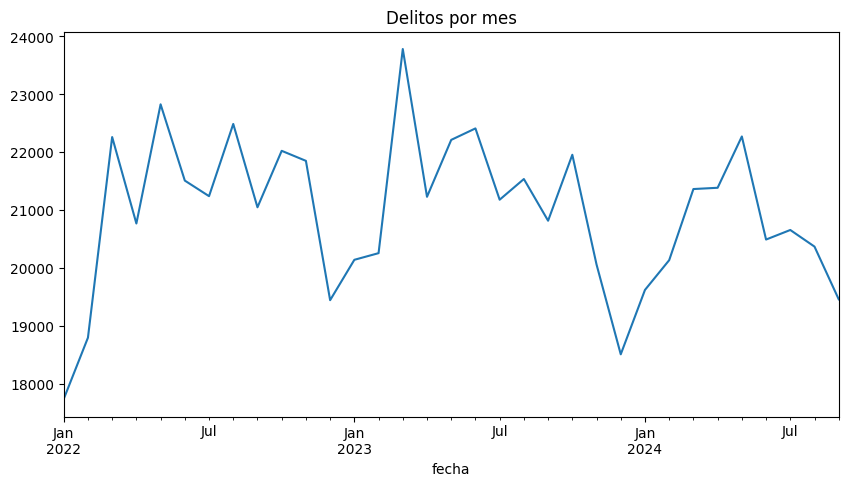

In [ ]:
df_main['fecha'] = pd.to_datetime(df_main['fecha_inicio'], errors='coerce')
df_main.set_index('fecha')['delito'].resample('M').count().plot(figsize=(10,5), title='Delitos por mes')


C:\Users\jorge\AppData\Local\Temp\ipykernel_32604\2488904504.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_delitos.values, y=top_delitos.index, palette='viridis')


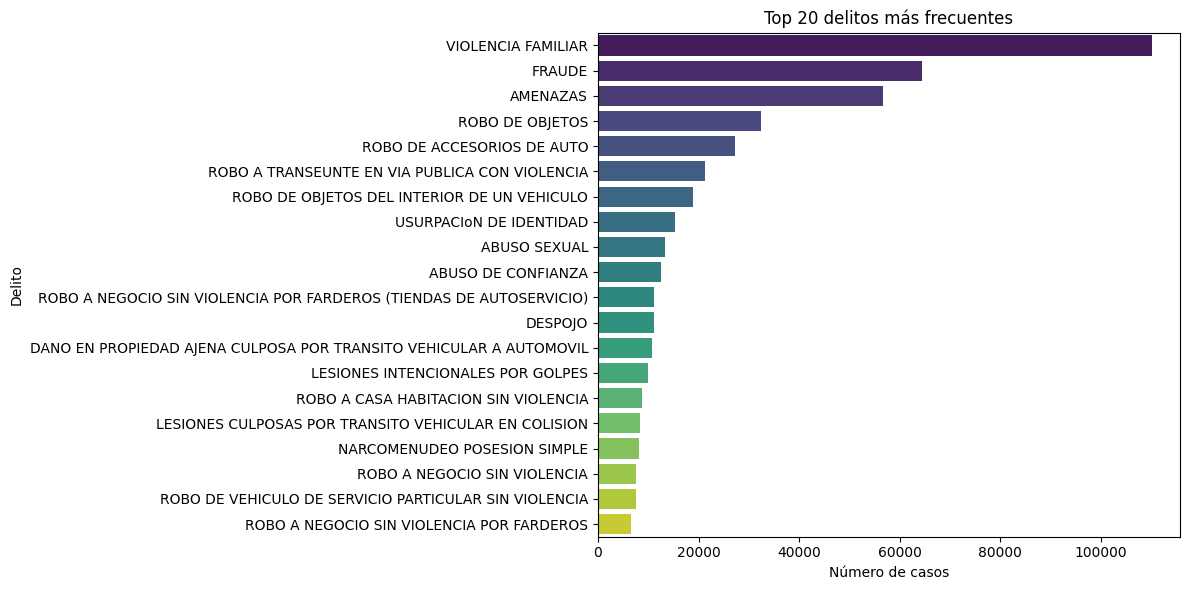

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 20 delitos más comunes
top_delitos = df_main['delito'].value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_delitos.values, y=top_delitos.index, palette='viridis')
plt.title('Top 20 delitos más frecuentes')
plt.xlabel('Número de casos')
plt.ylabel('Delito')
plt.tight_layout()
plt.show()



In [ ]:
df_main.isna().sum()

fecha_inicio           0
hora_inicio            0
fecha_hecho            0
hora_hecho           100
delito                 0
categoria_delito       0
sexo                   0
edad                   0
tipo_persona           0
calidad_juridica       0
competencia            0
id_colonia_hecho       0
id_alcaldia_hecho      0
municipio_hecho        0
latitud                0
longitud               0
fecha                  0
dtype: int64

In [ ]:
df_main['delito'].value_counts()

delito
VIOLENCIA FAMILIAR                                                        110198
FRAUDE                                                                     64507
AMENAZAS                                                                   56572
ROBO DE OBJETOS                                                            32478
ROBO DE ACCESORIOS DE AUTO                                                 27315
                                                                           ...  
PERDIDA DE LA VIDA POR ENVENENAMIENTO                                          1
OPERACIONES CON RECURSOS DE PROCEDENCIA ILEGAL                                 1
PROCREACION ASISTIDA, INSEMINACION ARTIFICIAL Y ESTERILIZACION FORZADA         1
CALUMNIAS                                                                      1
ROBO A TRANSEUNTE EN VIA PUBLICA (NOMINA) SIN VIOLENCIA                        1
Name: count, Length: 314, dtype: int64

In [ ]:
df_main['delito'].nunique()

314

In [ ]:
col1 = df_main['delito'].str.strip().str.lower()

In [ ]:
col1.value_counts()

delito
violencia familiar                                                        110198
fraude                                                                     64507
amenazas                                                                   56572
robo de objetos                                                            32478
robo de accesorios de auto                                                 27315
                                                                           ...  
perdida de la vida por envenenamiento                                          1
operaciones con recursos de procedencia ilegal                                 1
procreacion asistida, inseminacion artificial y esterilizacion forzada         1
calumnias                                                                      1
robo a transeunte en via publica (nomina) sin violencia                        1
Name: count, Length: 302, dtype: int64

In [ ]:
col1.nunique()

302

In [ ]:
df_main['categoria_delito'].value_counts()

categoria_delito
DELITO DE BAJO IMPACTO                                     601181
ROBO A TRANSEUNTE EN VIA PUBLICA CON Y SIN VIOLENCIA        26929
ROBO DE VEHICULO CON Y SIN VIOLENCIA                        19101
HECHO NO DELICTIVO                                          12992
VIOLACIoN                                                    7605
ROBO A NEGOCIO CON VIOLENCIA                                 6148
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA        3846
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                        3519
HOMICIDIO DOLOSO                                             3236
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO                2547
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA      2344
ROBO A CASA HABITACIoN CON VIOLENCIA                          710
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA       632
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA                 604
ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA                   

In [ ]:
df_main['categoria_delito'].nunique()

17

In [ ]:
df_main['categoria_delito'].value_counts()

categoria_delito
DELITO DE BAJO IMPACTO                                     601181
ROBO A TRANSEUNTE EN VIA PUBLICA CON Y SIN VIOLENCIA        26929
ROBO DE VEHICULO CON Y SIN VIOLENCIA                        19101
HECHO NO DELICTIVO                                          12992
VIOLACIoN                                                    7605
ROBO A NEGOCIO CON VIOLENCIA                                 6148
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA        3846
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                        3519
HOMICIDIO DOLOSO                                             3236
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO                2547
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA      2344
ROBO A CASA HABITACIoN CON VIOLENCIA                          710
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA       632
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA                 604
ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA                   

In [ ]:
df_main['categoria_delito'] = df_main['categoria_delito'].str.strip().str.lower()

In [ ]:
df_main['categoria_delito'].value_counts()

categoria_delito
delito de bajo impacto                                     601181
robo a transeunte en via publica con y sin violencia        26929
robo de vehiculo con y sin violencia                        19101
hecho no delictivo                                          12992
violacion                                                    7605
robo a negocio con violencia                                 6148
robo a pasajero a bordo del metro con y sin violencia        3846
robo a repartidor con y sin violencia                        3519
homicidio doloso                                             3236
lesiones dolosas por disparo de arma de fuego                2547
robo a pasajero a bordo de microbus con y sin violencia      2344
robo a casa habitacion con violencia                          874
robo a cuentahabiente saliendo del cajero con violencia       632
robo a pasajero a bordo de taxi con violencia                 604
robo a transportista con y sin violencia                   

In [ ]:
df_main

,fecha_inicio,hora_inicio,fecha_hecho,hora_hecho,delito,categoria_delito,sexo,edad,tipo_persona,calidad_juridica,competencia,id_colonia_hecho,id_alcaldia_hecho,municipio_hecho,latitud,longitud,fecha
0,2022-01-01,16:54:00,2022-01-01,14:30:00,PERDIDA DE LA VIDA POR OTRAS CAUSAS,hecho no delictivo,Masculino,65,FISICA,CADAVER,HECHO NO DELICTIVO,1671,12,CDMX,19.172039,-98.992750,2022-01-01
1,2022-01-01,14:59:00,2022-01-01,13:28:00,PERDIDA DE LA VIDA POR SUICIDIO,hecho no delictivo,Masculino,47,FISICA,CADAVER,HECHO NO DELICTIVO,1671,12,CDMX,19.174571,-98.997522,2022-01-01
2,2022-01-01,20:56:00,2021-10-05,12:00:00,DANO EN PROPIEDAD AJENA CULPOSA,delito de bajo impacto,No se especifica,No se especifica,MORAL,OFENDIDO,FUERO COMUN,1680,12,CDMX,19.181019,-99.074781,2022-01-01
3,2022-01-01,23:55:00,2022-01-01,18:00:00,VIOLENCIA FAMILIAR,delito de bajo impacto,Femenino,34,FISICA,DENUNCIANTE Y VICTIMA,FUERO COMUN,926,12,CDMX,19.187208,-99.028247,2022-01-01
4,2022-01-01,21:12:00,2021-10-28,12:00:00,ROBO DE OBJETOS,delito de bajo impacto,Masculino,No se especifica,FISICA,DENUNCIANTE Y VICTIMA,FUERO COMUN,1247,12,CDMX,19.191140,-99.050334,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691818,2024-09-30,23:15:30,2024-09-30,00:00:00,DISCRIMINACION,delito de bajo impacto,Femenino,No se especifica,FISICA,DENUNCIANTE Y VICTIMA,FUERO COMUN,2040,17,CDMX,0.000000,0.000000,2024-09-30
691819,2024-09-30,23:23:47,2022-12-01,12:00:00,LA ADMINISTRACION DE JUSTICIA,delito de bajo impacto,Masculino,No se especifica,FISICA,DENUNCIANTE Y VICTIMA,FUERO COMUN,2040,17,CDMX,0.000000,0.000000,2024-09-30
691820,2024-09-30,23:31:35,2024-09-30,08:34:00,LESIONES CULPOSAS,delito de bajo impacto,Masculino,No se especifica,FISICA,LESIONADO,FUERO COMUN,2040,17,CDMX,0.000000,0.000000,2024-09-30
691821,2024-09-30,23:37:39,2024-05-09,00:00:00,ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA P...,delito de bajo impacto,Masculino,No se especifica,FISICA,DENUNCIANTE Y VICTIMA,FUERO COMUN,2040,17,CDMX,0.000000,0.000000,2024-09-30


In [ ]:
mapa = folium.Map(location=[19.4326, -99.1332], zoom_start=11)

In [ ]:
for _, row in df_main.head(1000).iterrows():
    folium.CircleMarker(
        location=[row["latitud"], row["longitud"]],
        radius=3,
        popup=row["delito"],
        color="red",
        fill=True,
        fill_opacity=0.6
    ).add_to(mapa)


In [ ]:
mapa

In [ ]:
df_all = pd.read_sql("""
                SELECT
                     P.fecha_hecho, P.hora_hecho, P.delito, P.categoria_delito, P.sexo, P.Edad, C.Colonia, A.alcaldia, P.municipio_hecho, P.latitud, P.Longitud
                FROM tablaPrincipal P
                JOIN tablaAlcaldias A
                    ON P.id_alcaldia_hecho = A.alcaldia_id
                JOIN tablaColonias C
                    ON P.id_colonia_hecho = C.colonia_id
                ORDER BY
                    P.fecha_hecho, P.delito, P.categoria_delito, C.Colonia, A.alcaldia, P.municipio_hecho
                """, engine)

In [ ]:
df_all

,fecha_hecho,hora_hecho,delito,categoria_delito,sexo,edad,Colonia,alcaldia,municipio_hecho,latitud,longitud
0,1950-05-05,12:00:00,DDH OTRAS MATERIAS,HECHO NO DELICTIVO,Masculino,No se especifica,LA ANGOSTURA,ALVARO OBREGON,CDMX,19.333430,-99.235722
1,1955-06-07,16:00:00,COBRANZA ILEGITIMA,DELITO DE BAJO IMPACTO,Femenino,25,ISIDRO FABELA,TLALPAN,CDMX,19.299737,-99.172458
2,1957-12-01,12:00:00,VIOLACION EQUIPARADA,VIOLACIoN,Masculino,27,PORTALES SUR,BENITO JUAREZ,CDMX,19.366003,-99.152274
3,1962-05-29,6:30:00,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,DELITO DE BAJO IMPACTO,Masculino,55,A.M.S.A.,TLALPAN,CDMX,19.284482,-99.137468
4,1962-07-09,16:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,ROBO DE VEHICULO CON Y SIN VIOLENCIA,Femenino,59,HEROES DE 1910,TLALPAN,CDMX,19.243596,-99.240493
...,...,...,...,...,...,...,...,...,...,...,...
691818,2024-09-30,0:00:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Femenino,25,SAN JUAN TLIHUACA,AZCAPOTZALCO,CDMX,19.492773,-99.201554
691819,2024-09-30,17:30:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Masculino,27,SAN PEDRO DE LOS PINOS,BENITO JUAREZ,CDMX,19.397129,-99.178459
691820,2024-09-30,1:00:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Femenino,56,SANTA ANA PONIENTE,TLAHUAC,CDMX,19.303836,-99.043042
691821,2024-09-30,17:55:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Masculino,39,SANTA ANA PONIENTE,TLAHUAC,CDMX,19.308079,-99.048410


C:\Users\jorge\AppData\Local\Temp\ipykernel_32604\810934292.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.index, y=conteo.values, palette="mako")


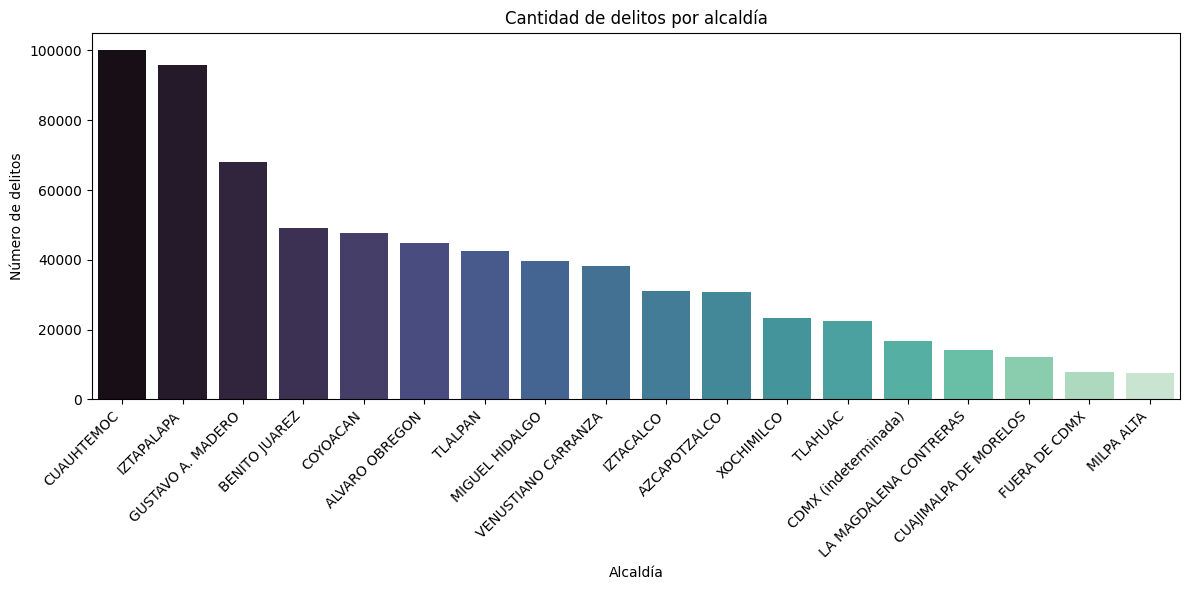

In [ ]:
# Conteo total de delitos por alcaldía
conteo = df_all['alcaldia'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=conteo.index, y=conteo.values, palette="mako")
plt.xticks(rotation=45, ha='right')
plt.title("Cantidad de delitos por alcaldía")
plt.xlabel("Alcaldía")
plt.ylabel("Número de delitos")
plt.tight_layout()
plt.show()


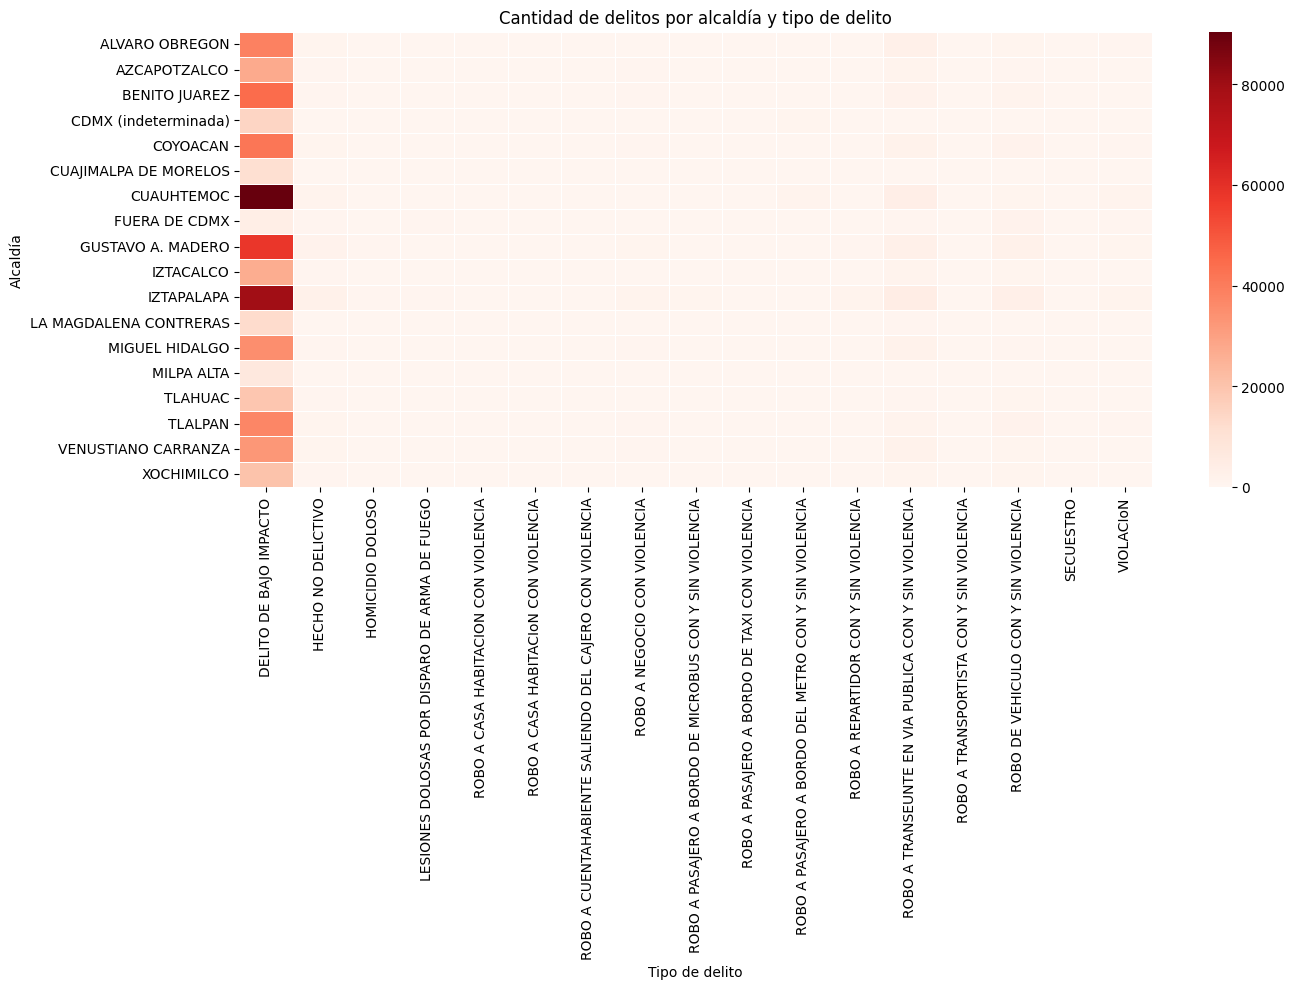

In [ ]:
tabla = df_all.groupby(['alcaldia', 'categoria_delito']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 10))
sns.heatmap(tabla, cmap="Reds", linewidths=.5)
plt.title("Cantidad de delitos por alcaldía y tipo de delito")
plt.xlabel("Tipo de delito")
plt.ylabel("Alcaldía")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
df_all['alcaldia'].nunique()

18

In [ ]:
df_all['categoria_delito'].nunique()

17

In [ ]:

os.getcwd()


'c:\\Users\\jorge\\Downloads'

In [ ]:
df_all['alcaldia'].value_counts()

alcaldia
CUAUHTEMOC                100049
IZTAPALAPA                 95780
GUSTAVO A. MADERO          68090
BENITO JUAREZ              49006
COYOACAN                   47670
ALVARO OBREGON             44693
TLALPAN                    42652
MIGUEL HIDALGO             39747
VENUSTIANO CARRANZA        38187
IZTACALCO                  31133
AZCAPOTZALCO               30765
XOCHIMILCO                 23185
TLAHUAC                    22558
CDMX (indeterminada)       16730
LA MAGDALENA CONTRERAS     14120
CUAJIMALPA DE MORELOS      12230
FUERA DE CDMX               7762
MILPA ALTA                  7466
Name: count, dtype: int64

In [ ]:

geojson['features'][0]['properties']


{'CVEGEO': '09002',
 'CVE_ENT': '09',
 'CVE_MUN': '002',
 'NOMGEO': 'Azcapotzalco'}

In [ ]:
geo_alcaldias = set([feature['properties']['NOMGEO'].upper() for feature in geojson['features']])


In [ ]:
geo_alcaldias

{'AZCAPOTZALCO',
 'BENITO JUÁREZ',
 'COYOACÁN',
 'CUAJIMALPA DE MORELOS',
 'CUAUHTÉMOC',
 'GUSTAVO A. MADERO',
 'IZTACALCO',
 'IZTAPALAPA',
 'LA MAGDALENA CONTRERAS',
 'MIGUEL HIDALGO',
 'MILPA ALTA',
 'TLALPAN',
 'TLÁHUAC',
 'VENUSTIANO CARRANZA',
 'XOCHIMILCO',
 'ÁLVARO OBREGÓN'}

In [ ]:
df_por_alcaldia = set(df_all['alcaldia'].str.upper().unique())


In [ ]:
df_por_alcaldia


{'AZCAPOTZALCO',
 'BENITO JUÁREZ',
 'CDMX (INDETERMINADA)',
 'COYOACÁN',
 'CUAJIMALPA DE MORELOS',
 'CUAUHTÉMOC',
 'FUERA DE CDMX',
 'GUSTAVO A. MADERO',
 'IZTACALCO',
 'IZTAPALAPA',
 'LA MAGDALENA CONTRERAS',
 'MIGUEL HIDALGO',
 'MILPA ALTA',
 'TLALPAN',
 'TLÁHUAC',
 'VENUSTIANO CARRANZA',
 'XOCHIMILCO',
 'ÁLVARO OBREGÓN'}

In [ ]:
geo_sin_datos = geo_alcaldias - df_por_alcaldia
datos_sin_geo = df_por_alcaldia - geo_alcaldias

print("Alcaldías en GeoJSON sin datos:", geo_sin_datos)
print("Alcaldías con datos sin geometría:", datos_sin_geo)


Alcaldías en GeoJSON sin datos: set()
Alcaldías con datos sin geometría: {'FUERA DE CDMX', 'CDMX (INDETERMINADA)'}


In [ ]:
reemplazos = {
    'ALVARO OBREGON': 'ÁLVARO OBREGÓN',
    'BENITO JUAREZ': 'BENITO JUÁREZ',
    'CUAUHTEMOC': 'CUAUHTÉMOC',
    'TLAHUAC': 'TLÁHUAC',
    'COYOACAN': 'COYOACÁN',
}

# Convertimos a mayúsculas y limpiamos
df_all['alcaldia'] = df_all['alcaldia'].str.strip().str.upper()
df_all['alcaldia'] = df_all['alcaldia'].replace(reemplazos)


In [ ]:
print(sorted(df_all['alcaldia'].unique()))

['AZCAPOTZALCO', 'BENITO JUÁREZ', 'CDMX (INDETERMINADA)', 'COYOACÁN', 'CUAJIMALPA DE MORELOS', 'CUAUHTÉMOC', 'FUERA DE CDMX', 'GUSTAVO A. MADERO', 'IZTACALCO', 'IZTAPALAPA', 'LA MAGDALENA CONTRERAS', 'MIGUEL HIDALGO', 'MILPA ALTA', 'TLALPAN', 'TLÁHUAC', 'VENUSTIANO CARRANZA', 'XOCHIMILCO', 'ÁLVARO OBREGÓN']


In [ ]:
delitos_unicos = df_all['categoria_delito'].str.upper().unique()

# Genera 16 colores únicos de la paleta 'tab20'
colores = plt.cm.get_cmap('tab20', len(delitos_unicos)).colors

# Convertir colores RGB a HEX
colores_hex = ['#%02x%02x%02x' % tuple(int(c*255) for c in color[:3]) for color in colores]





C:\Users\jorge\AppData\Local\Temp\ipykernel_32604\1200251200.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colores = plt.cm.get_cmap('tab20', len(delitos_unicos)).colors


In [ ]:
color_map = dict(zip(delitos_unicos, colores_hex))
color_map['No disponible'] = '#D3D3D3'  # Gris claro para los que no tengan datos

In [ ]:
geo_path = "limite_alcaldias.json"
with open("G:/My Drive/Education/4Geeks/Prework_DataScience/Final_Project/src/limite_alcaldias.json", encoding='utf-8') as f:
    geojson = json.load(f)


In [ ]:
conteo = df_all.groupby(['alcaldia', 'categoria_delito']).size().reset_index(name='conteo')

#delito_mas_comun = conteo.sort_values('conteo', ascending=False).drop_duplicates('categoria_delito')


In [ ]:
delito_mas_comun = conteo.sort_values(['alcaldia', 'conteo'], ascending=False).drop_duplicates('alcaldia', keep='first')

In [ ]:
conteo[conteo ['alcaldia'] == 'IZTAPALAPA']

,alcaldia,categoria_delito,conteo
147,IZTAPALAPA,DELITO DE BAJO IMPACTO,79476
148,IZTAPALAPA,HECHO NO DELICTIVO,2300
149,IZTAPALAPA,HOMICIDIO DOLOSO,661
150,IZTAPALAPA,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,473
151,IZTAPALAPA,ROBO A CASA HABITACION CON VIOLENCIA,37
152,IZTAPALAPA,ROBO A CASA HABITACIoN CON VIOLENCIA,151
153,IZTAPALAPA,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON ...,137
154,IZTAPALAPA,ROBO A NEGOCIO CON VIOLENCIA,1208
155,IZTAPALAPA,ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN ...,764
156,IZTAPALAPA,ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA,92


In [ ]:
# Creamos un diccionario: alcaldía -> delito más común
dict_delito = dict(zip(delito_mas_comun['alcaldia'], delito_mas_comun['categoria_delito']))

# Agregar columna de delito al GeoJSON
for feature in geojson['features']:
    alcaldia = feature['properties']['NOMGEO'].upper()
    feature['properties']['delito'] = dict_delito.get(alcaldia, 'No disponible')

# Crear mapa base
m = folium.Map(location=[19.4, -99.1], zoom_start=10)

# Añadir capa GeoJSON con colores y tooltip
folium.GeoJson(
    geojson,
    name="Delito más común por alcaldía",
    style_function=lambda feature: {
        'fillColor': color_map.get(feature['properties']['delito'], '#FFFFFF'),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.6
    },
    tooltip=GeoJsonTooltip(
        fields=['NOMGEO', 'delito'],
        aliases=['Alcaldía:', 'Delito más común:'],
        localize=True
    )
).add_to(m)

In [ ]:
m

In [ ]:
categoria_objetivo = "DELITO DE BAJO IMPACTO"  # o la que haya salido como más común
df_filtrado = df_all[df_all['categoria_delito'] == categoria_objetivo]


In [ ]:
df_filtrado

,fecha_hecho,hora_hecho,delito,categoria_delito,sexo,edad,Colonia,alcaldia,municipio_hecho,latitud,longitud
1,1955-06-07,16:00:00,COBRANZA ILEGITIMA,DELITO DE BAJO IMPACTO,Femenino,25,ISIDRO FABELA,TLALPAN,CDMX,19.299737,-99.172458
3,1962-05-29,6:30:00,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,DELITO DE BAJO IMPACTO,Masculino,55,A.M.S.A.,TLALPAN,CDMX,19.284482,-99.137468
5,1962-09-11,13:45:00,AMENAZAS,DELITO DE BAJO IMPACTO,Masculino,60,DEL CARMEN,COYOACÁN,CDMX,19.351477,-99.158951
9,1967-02-09,14:35:00,ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIE...,DELITO DE BAJO IMPACTO,No se especifica,No se especifica,TRANSITO,CUAUHTÉMOC,CDMX,19.417759,-99.130273
11,1967-04-12,22:16:00,ABUSO DE CONFIANZA,DELITO DE BAJO IMPACTO,Femenino,56,CANTERA PUENTE DE PIEDRA,TLALPAN,CDMX,19.297905,-99.163931
...,...,...,...,...,...,...,...,...,...,...,...
691818,2024-09-30,0:00:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Femenino,25,SAN JUAN TLIHUACA,AZCAPOTZALCO,CDMX,19.492773,-99.201554
691819,2024-09-30,17:30:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Masculino,27,SAN PEDRO DE LOS PINOS,BENITO JUÁREZ,CDMX,19.397129,-99.178459
691820,2024-09-30,1:00:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Femenino,56,SANTA ANA PONIENTE,TLÁHUAC,CDMX,19.303836,-99.043042
691821,2024-09-30,17:55:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Masculino,39,SANTA ANA PONIENTE,TLÁHUAC,CDMX,19.308079,-99.048410


In [ ]:
delitos_por_alcaldia = df_filtrado['alcaldia'].value_counts().reset_index()
delitos_por_alcaldia.columns = ['alcaldia', 'conteo']


In [ ]:
delitos_por_alcaldia

,alcaldia,conteo
0,CUAUHTÉMOC,90407
1,IZTAPALAPA,79476
2,GUSTAVO A. MADERO,58153
3,BENITO JUÁREZ,44545
4,COYOACÁN,41801
5,ÁLVARO OBREGÓN,38716
6,TLALPAN,37311
7,MIGUEL HIDALGO,35199
8,VENUSTIANO CARRANZA,32711
9,AZCAPOTZALCO,27213


In [ ]:
with open("G:/My Drive/Education/4Geeks/Prework_DataScience/Final_Project/src/limite_alcaldias.json", encoding='utf-8') as f:
    geojson_data = json.load(f)

In [ ]:
copia = delitos_por_alcaldia.copy()
copia['alcaldia'] = copia['alcaldia'].str.title()
copia['alcaldia'] = copia['alcaldia'].str.replace('Cuajimalpa De Morelos', 'Cuajimalpa de Morelos')

In [ ]:
# Crear el mapa base
mapa2 = folium.Map(location=[19.4326, -99.1332], zoom_start=10)  # CDMX

# Añadir capa coroplética
Choropleth(
    geo_data=geojson_data,
    data=copia,
    columns=['alcaldia', 'conteo'],
    key_on='feature.properties.NOMGEO',
    fill_color='Reds',
    #fill_opacity=0.7,
    #line_opacity=0.2,
    legend_name=f'Cantidad de delitos: {categoria_objetivo}',
    #highlight=True
).add_to(mapa2)

# Mostrar
mapa2


In [ ]:
print(delitos_por_alcaldia.dtypes)


alcaldia    object
conteo       int64
dtype: object


In [ ]:
t1 = set(copia['alcaldia'].unique())
t2 = set([f['properties']['NOMGEO'] for f in geojson_data['features']])

In [ ]:
t2 - t1

{'Cuajimalpa de Morelos'}

In [ ]:
copia

,alcaldia,conteo
0,Cuauhtémoc,90407
1,Iztapalapa,79476
2,Gustavo A. Madero,58153
3,Benito Juárez,44545
4,Coyoacán,41801
5,Álvaro Obregón,38716
6,Tlalpan,37311
7,Miguel Hidalgo,35199
8,Venustiano Carranza,32711
9,Azcapotzalco,27213


In [ ]:
print(delitos_por_alcaldia['alcaldia'].unique())
print([f['properties']['NOMGEO'] for f in geojson_data['features']])


['CUAUHTÉMOC' 'IZTAPALAPA' 'GUSTAVO A. MADERO' 'BENITO JUÁREZ' 'COYOACÁN'
 'ÁLVARO OBREGÓN' 'TLALPAN' 'MIGUEL HIDALGO' 'VENUSTIANO CARRANZA'
 'AZCAPOTZALCO' 'IZTACALCO' 'XOCHIMILCO' 'TLÁHUAC' 'CDMX (INDETERMINADA)'
 'LA MAGDALENA CONTRERAS' 'CUAJIMALPA DE MORELOS' 'MILPA ALTA'
 'FUERA DE CDMX']
['Azcapotzalco', 'Coyoacán', 'Cuajimalpa de Morelos', 'Gustavo A. Madero', 'Iztacalco', 'Iztapalapa', 'La Magdalena Contreras', 'Milpa Alta', 'Álvaro Obregón', 'Tláhuac', 'Tlalpan', 'Xochimilco', 'Benito Juárez', 'Cuauhtémoc', 'Miguel Hidalgo', 'Venustiano Carranza']


In [ ]:
mapa2.save("G:/My Drive/Education/4Geeks/Prework_DataScience/Final_Project/src/mapa_delitos_bajo_impacto.html")
mapa.save("G:/My Drive/Education/4Geeks/Prework_DataScience/Final_Project/src/mapa_delitos.html")
m.save("G:/My Drive/Education/4Geeks/Prework_DataScience/Final_Project/src/mapa_delitos_comunes_alcaldia.html")